INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '../models/AR_BuzzLightyearPlanetRescue.pth', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff130187550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook

INFO:tensorflow:loss = 0.88089114, step = 202800 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.835
INFO:tensorflow:loss = 0.55245197, step = 202900 (0.319 sec)
INFO:tensorflow:global_step/sec: 322.329
INFO:tensorflow:loss = 0.69629616, step = 203000 (0.310 sec)
INFO:tensorflow:global_step/sec: 324.299
INFO:tensorflow:loss = 0.72352636, step = 203100 (0.309 sec)
INFO:tensorflow:global_step/sec: 331.147
INFO:tensorflow:loss = 0.56952596, step = 203200 (0.303 sec)
INFO:tensorflow:global_step/sec: 314.369
INFO:tensorflow:loss = 1.2626202, step = 203300 (0.317 sec)
INFO:tensorflow:global_step/sec: 320.815
INFO:tensorflow:loss = 0.48460096, step = 203400 (0.312 sec)
INFO:tensorflow:global_step/sec: 311.111
INFO:tensorflow:loss = 1.0673798, step = 203500 (0.322 sec)
INFO:tensorflow:global_step/sec: 338.437
INFO:tensorflow:loss = 0.6271714, step = 203600 (0.296 sec)
INFO:tensorflow:global_step/sec: 316.128
INFO:tensorflow:loss = 0.8314651, step = 203700 (0.316 sec)
INFO:tensorflow:global_st

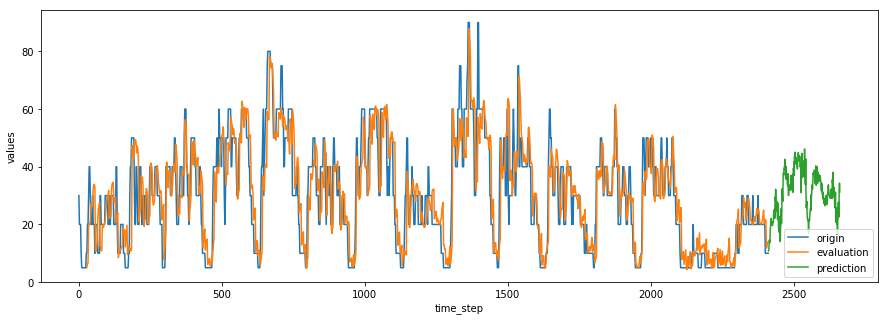

In [18]:
# coding: utf-8
from __future__ import print_function
import tensorflow as tf
import matplotlib.pyplot as plt

csv_file_name = '../data/BuzzLightyearPlanetRescue.txt'
reader = tf.contrib.timeseries.CSVReader(csv_file_name)
train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(
    reader,batch_size = 4,window_size=16
)

with tf.Session() as sess:
    data = reader.read_full()
    coord = tf.train.Coordinator()
    tf.train.start_queue_runners(sess=sess, coord=coord)
    data = sess.run(data)
    coord.request_stop()

ar = tf.contrib.timeseries.ARRegressor(
    periodicities=200,input_window_size=12,output_window_size=4,
    num_features=1,
    loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS,
    model_dir = u'../models/AR_BuzzLightyearPlanetRescue.pth'
)

ar.train(input_fn = train_input_fn,steps = 10000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn,steps = 1)

(predictions,) = tuple(ar.predict(
    input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
        evaluation,steps=250
    )
))


plt.figure(figsize=(15,5))
plt.plot(data['times'].reshape(-1),data['values'].reshape(-1),label=
'origin')
plt.plot(evaluation['times'].reshape(-1),evaluation['mean'].reshape(-1),
label='evaluation')
plt.plot(predictions['times'].reshape(-1),
predictions['mean'].reshape(-1),label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend(loc=4)
#plt.savefig('./predict_result.png')